# Final Project: Part I

## Problem Statement:
    
Turnover has a huge impact on the operations of a business, costing up to 15% of annual salary on average for every employee that leaves. Every companies inevitably faces the prospect of turnover of staff. If it was possible to predict why/when someeone was leaving, it would allow the business to focus on keeping someone on board or even cutting their losses. In a perfect world, it would be great to predict when an employee will leave and act proactively instead of reactionary, after an employee already exits the company.

## Data Used:

The data used for this project is private data from my companies data warehouse. Confidentiality is needed with the sensitive data. The names have been removed to reduce the ability to identify data points. The data spans back to 2008 to 2019 YTD.

## Model Targets and Features:

Possible #1 Target Variable = 'Termination Reason'

-Predict why someone will leave

Possible #2 Target Variable = 'Compa-Ratio'

-Predict if pay is a reason for someone leaving

Possible #3 Target Variable = 'Years of Service'

-Predict when someone will leave

Feature Set = Job Profile, Gender, Years of Service, Is Manager, Company, Location, Compa-Ratio (minus possible target variable)

## Goals and Success Metics

The goal of the model would to predict whether someone would leave the company based on provided variables. The data used in the model is randomized data imported from the business warehouse from my current position.

## Risks and Possible Pitfalls

The reason why someone leaves an organization is not just 'black and white,' there could be a multitude of external factors that drive the decision. Theses other factors are less predictable such as due to personal reasons. Other factors might weigh in such as education level, but these fields are not possible to extract with the current data warehouse setup.

The model is only as good as the data that get's put into it. There's always a chance that the input data is not accurate due to fault in inputting into the system or not capturing the holistic picture.

It might be necessary to turn fields that have strings into numerical values for prediction purposes (for trial purposes I created a handful of dummy columns)

### Considerations
I would need to be able to set up some sort of ranking to 'Compa-Ratio' column (the closer to 1 is ideal, above 1 = "Paid over market", under 1 = "Paid under market")

How to substantiate the column 'Job Profile', as they are string characters

### This would apply if I were to go foward with this project:

If you are working with proprietary data that should not be made public, then that fact gives you all the more reason not to add your data to your Git repository.

If exposing your data through your project notebooks would be a problem, then you can make your repository private on GitHub and add the members of the instructional team as collaborators.

If even presenting your project in class would be a problem, then we can make arrangements for you to present it just to the instructional team.

In [51]:
#Import data from csv

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('fivethirtyeight')

%matplotlib inline

data = pd.read_csv('test_data.csv')
data = data.drop('Employee ID', axis = 1)

In [52]:
data.head()

,Full Name,Business Title,Job Profile,Worker Type,Position ID,Compensation Grade,Gender,Race/Ethnicity (Locale Sensitive),Management Level,Hire Date,...,Primary Work Address - Country,Work Address - City,Total Base Pay - Amount,Total Base Pay - Currency,Compa-Ratio,Compensation Range - Minimum,Compensation Range - Midpoint,Compensation Range - Maximum,Last Base Pay Increase - Date,Last Base Pay Increase - Percent
0,196,"Account Manager, Label Relatio",Account Manager (Label Relations),Employee,P100510,CDM000-S3-11,Male,White (Not Hispanic or Latino) (United States ...,Professional,9/26/11,...,United States of America,New York,"90,000.00",USD,1.055,"76,770.00","85,300.00","98,095.00",9/26/11,0.0
1,200,Pricing and Yield Director,Revenue Operations Specialist,Employee,P100787,CUS030-P3-12,Male,Asian (Not Hispanic or Latino) (United States ...,NaN,6/4/12,...,United States of America,New York,"140,000.00",USD,1.496,"84,240.00","93,600.00","107,640.00",6/4/12,0.0
2,201,UI Designer,Lead Product Designer,Employee,P100726,MTC035-P4-13,Male,White (Not Hispanic or Latino) (United States ...,Professional,5/15/12,...,United States of America,New York,"125,000.00",USD,0.906,"124,240.05","138,044.50","158,751.18",5/15/12,0.0
3,202,Technical Recruiter,Lead Recruiter,Employee,P101028,AHR140-P3-11,Female,White (Not Hispanic or Latino) (United States ...,NaN,2/25/13,...,United States of America,New York,"117,000.00",USD,1.146,"91,890.00","102,100.00","117,415.00",2/25/13,0.0
4,204,Nordic Manager Director,Regional MD,Employee,P100111,CSA000-M3-14,Male,NaN,Director,11/1/10,...,Sweden,Stockholm,"1,260,000.00",SEK,1.277,"888,093.00","986,770.00","1,134,786.00",12/1/12,0.0


In [53]:
data.shape

(1815, 36)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 36 columns):
Full Name                            1815 non-null int64
Business Title                       1815 non-null object
Job Profile                          1815 non-null object
Worker Type                          1815 non-null object
Position ID                          1815 non-null object
Compensation Grade                   1815 non-null object
Gender                               1770 non-null object
Race/Ethnicity (Locale Sensitive)    601 non-null object
Management Level                     1622 non-null object
Hire Date                            1815 non-null object
Years of Service                     1815 non-null int64
Length of Service in Months          1815 non-null int64
Last Day of Work                     1815 non-null object
Termination Date - All               1815 non-null object
Resignation Date                     1224 non-null object
Is Manager                 

In [55]:
data.describe()

,Full Name,Years of Service,Length of Service in Months,Cost Center - ID,Compa-Ratio,Last Base Pay Increase - Percent
count,1815.000000,1815.000000,1815.000000,1815.000000,1.815000e+03,1815.000000
mean,2625.058953,2.289807,32.653444,13664.658953,7.130251e+02,0.047774
std,1280.325851,2.059956,24.765393,5165.117333,2.491023e+04,0.087631
min,196.000000,0.000000,0.000000,1020.000000,0.000000e+00,-0.500000
25%,1495.000000,1.000000,14.000000,14001.000000,8.555000e-01,0.000000
50%,2773.000000,2.000000,26.000000,16004.000000,9.590000e-01,0.030000
75%,3787.000000,4.000000,48.000000,17012.000000,1.073000e+00,0.054950
max,4632.000000,12.000000,153.000000,19401.000000,1.050000e+06,1.181800


In [56]:
dummies = pd.get_dummies(data, columns=['Gender','Termination Category','Is Manager'])
dummies.drop(['Length of Service in Months','Region','Job Profile'], axis='columns').head()

,Full Name,Business Title,Worker Type,Position ID,Compensation Grade,Race/Ethnicity (Locale Sensitive),Management Level,Hire Date,Years of Service,Last Day of Work,...,Compensation Range - Maximum,Last Base Pay Increase - Date,Last Base Pay Increase - Percent,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Not declared,Termination Category_Terminate Employee > Forced Attrition,Termination Category_Terminate Employee > Voluntary Attrition,Is Manager_Yes
0,196,"Account Manager, Label Relatio",Employee,P100510,CDM000-S3-11,White (Not Hispanic or Latino) (United States ...,Professional,9/26/11,1,3/29/13,...,"98,095.00",9/26/11,0.0,0,1,0,0,1,0,0
1,200,Pricing and Yield Director,Employee,P100787,CUS030-P3-12,Asian (Not Hispanic or Latino) (United States ...,NaN,6/4/12,0,4/9/13,...,"107,640.00",6/4/12,0.0,0,1,0,0,0,1,0
2,201,UI Designer,Employee,P100726,MTC035-P4-13,White (Not Hispanic or Latino) (United States ...,Professional,5/15/12,0,4/17/13,...,"158,751.18",5/15/12,0.0,0,1,0,0,0,1,0
3,202,Technical Recruiter,Employee,P101028,AHR140-P3-11,White (Not Hispanic or Latino) (United States ...,NaN,2/25/13,0,4/18/13,...,"117,415.00",2/25/13,0.0,1,0,0,0,1,0,0
4,204,Nordic Manager Director,Employee,P100111,CSA000-M3-14,NaN,Director,11/1/10,2,4/19/13,...,"1,134,786.00",12/1/12,0.0,0,1,0,0,1,0,0


## Check for any correleations between columns

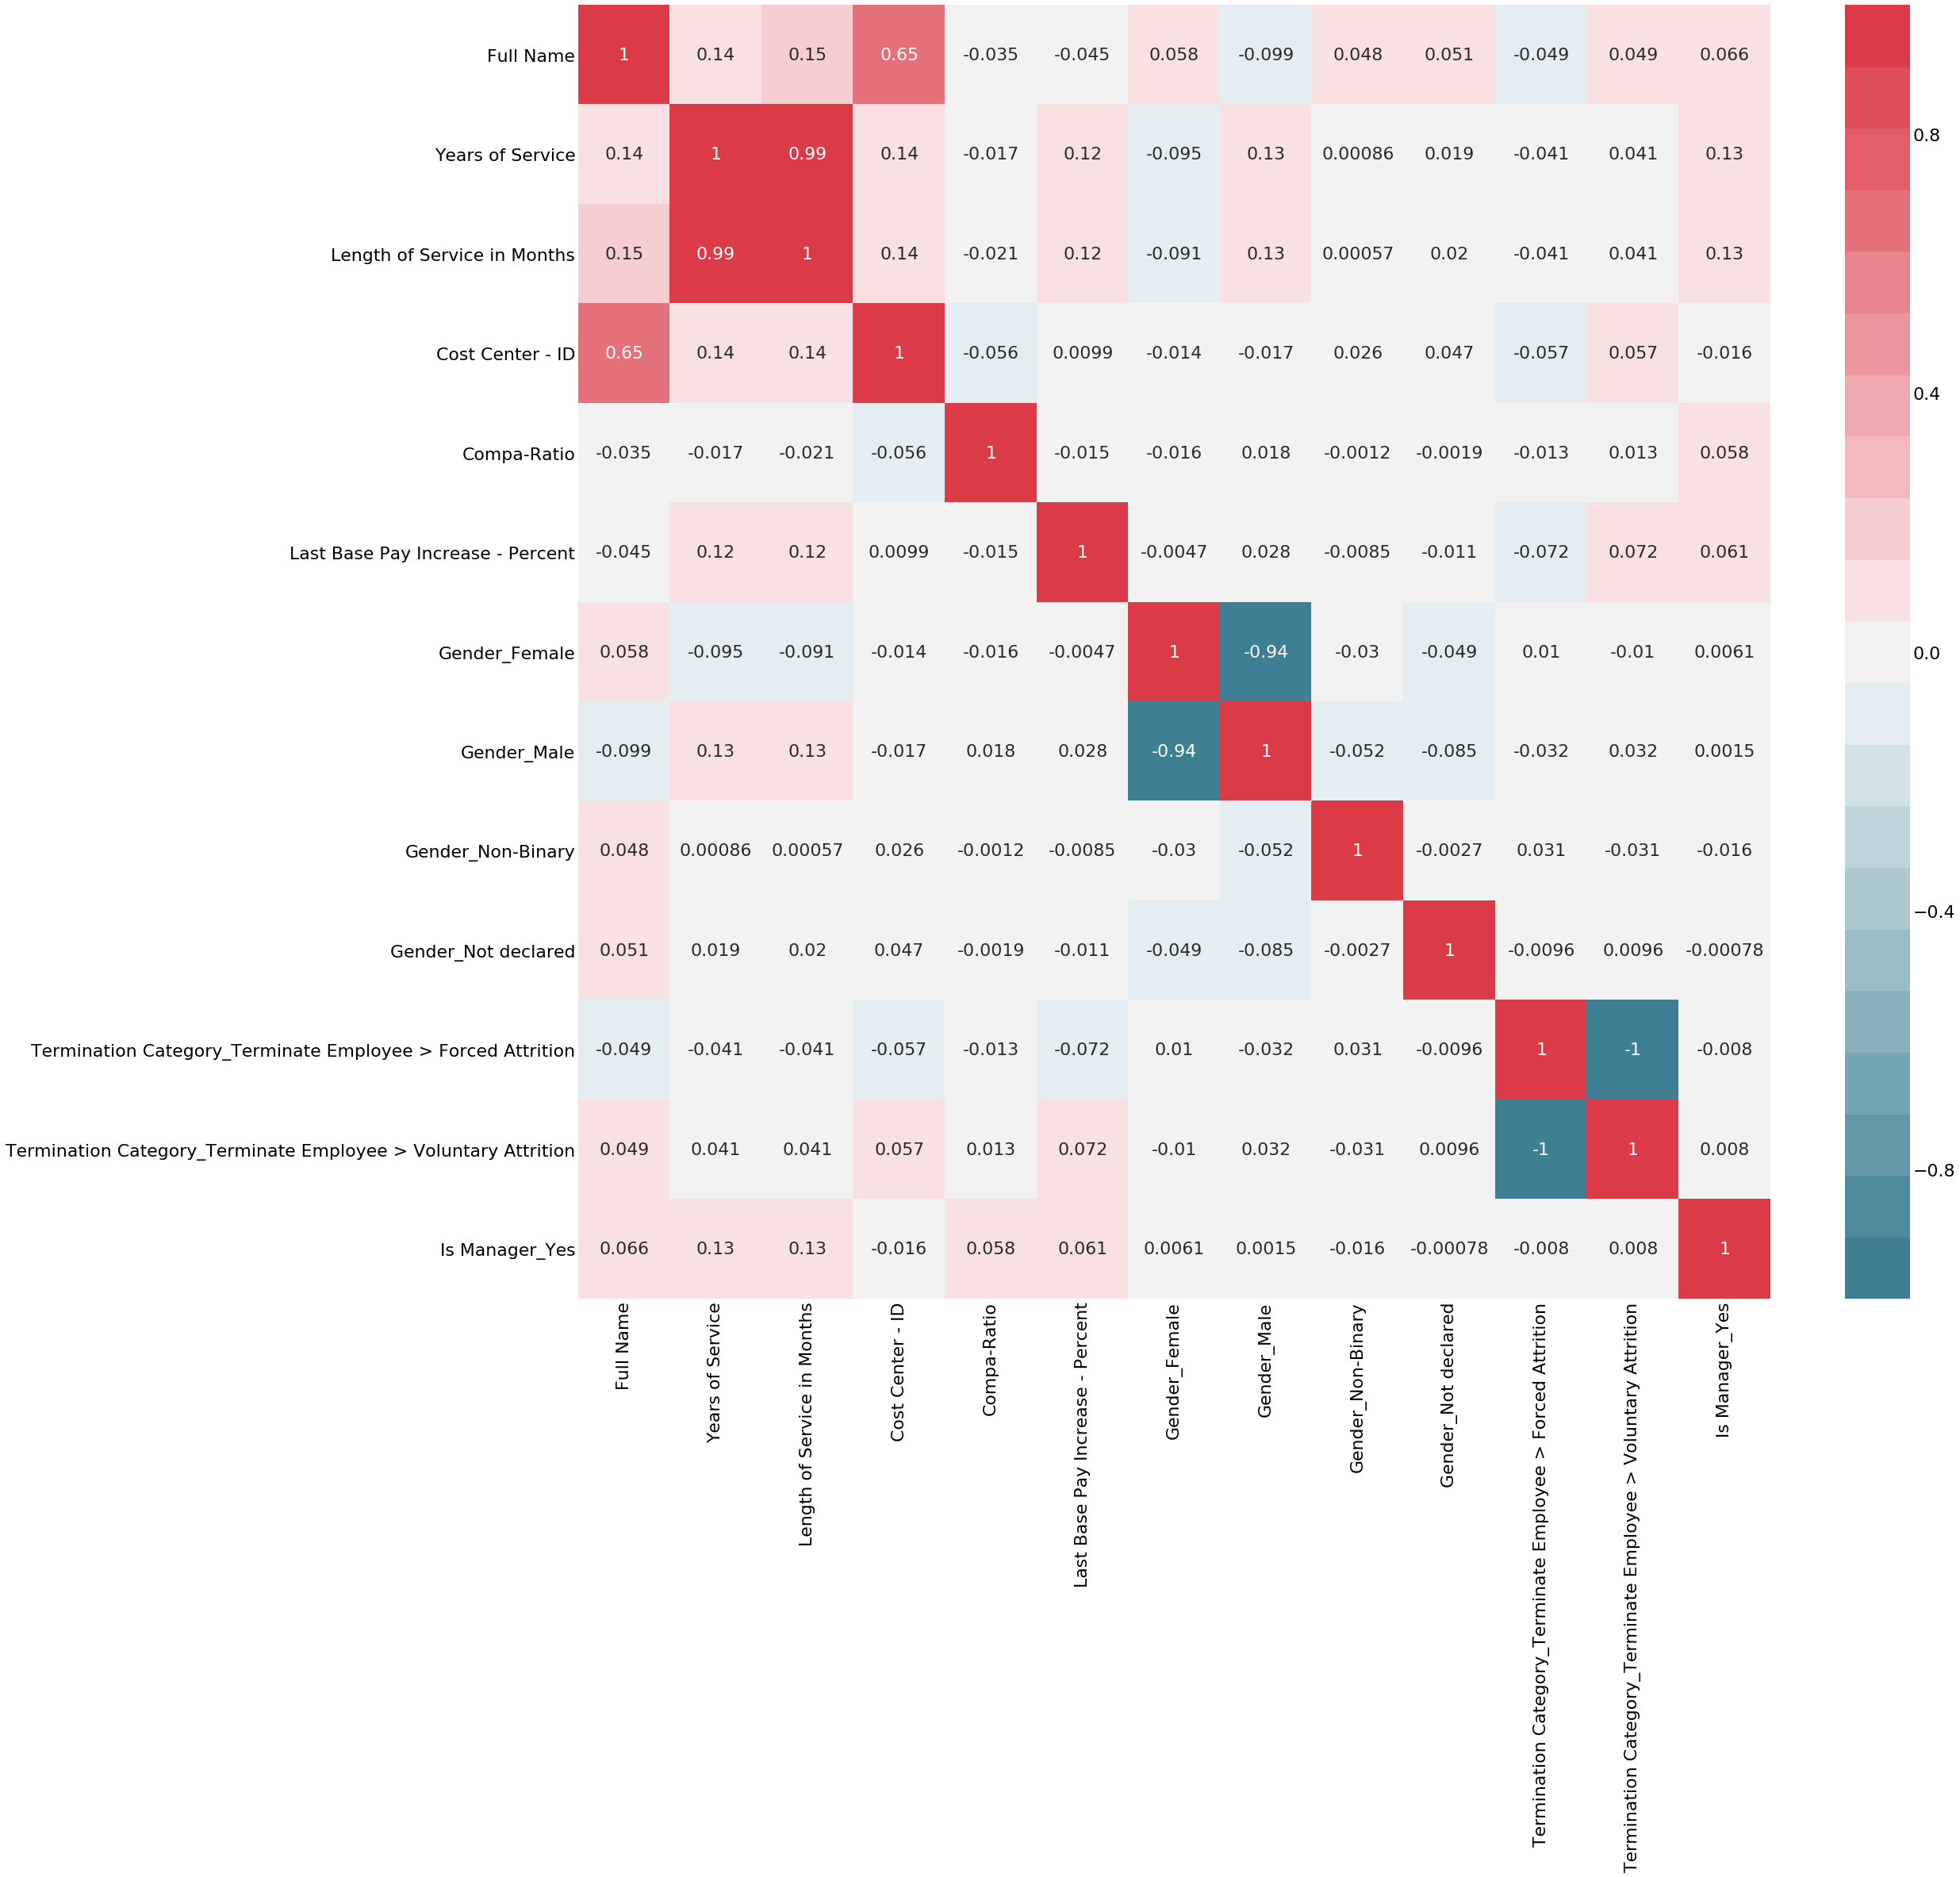

In [58]:
fig, ax = plt.subplots(figsize=(30, 30))
plt.rcParams.update({'font.size': 22})
sns.heatmap(dummies.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
             ax=ax,
           );

In [84]:
data = dummies

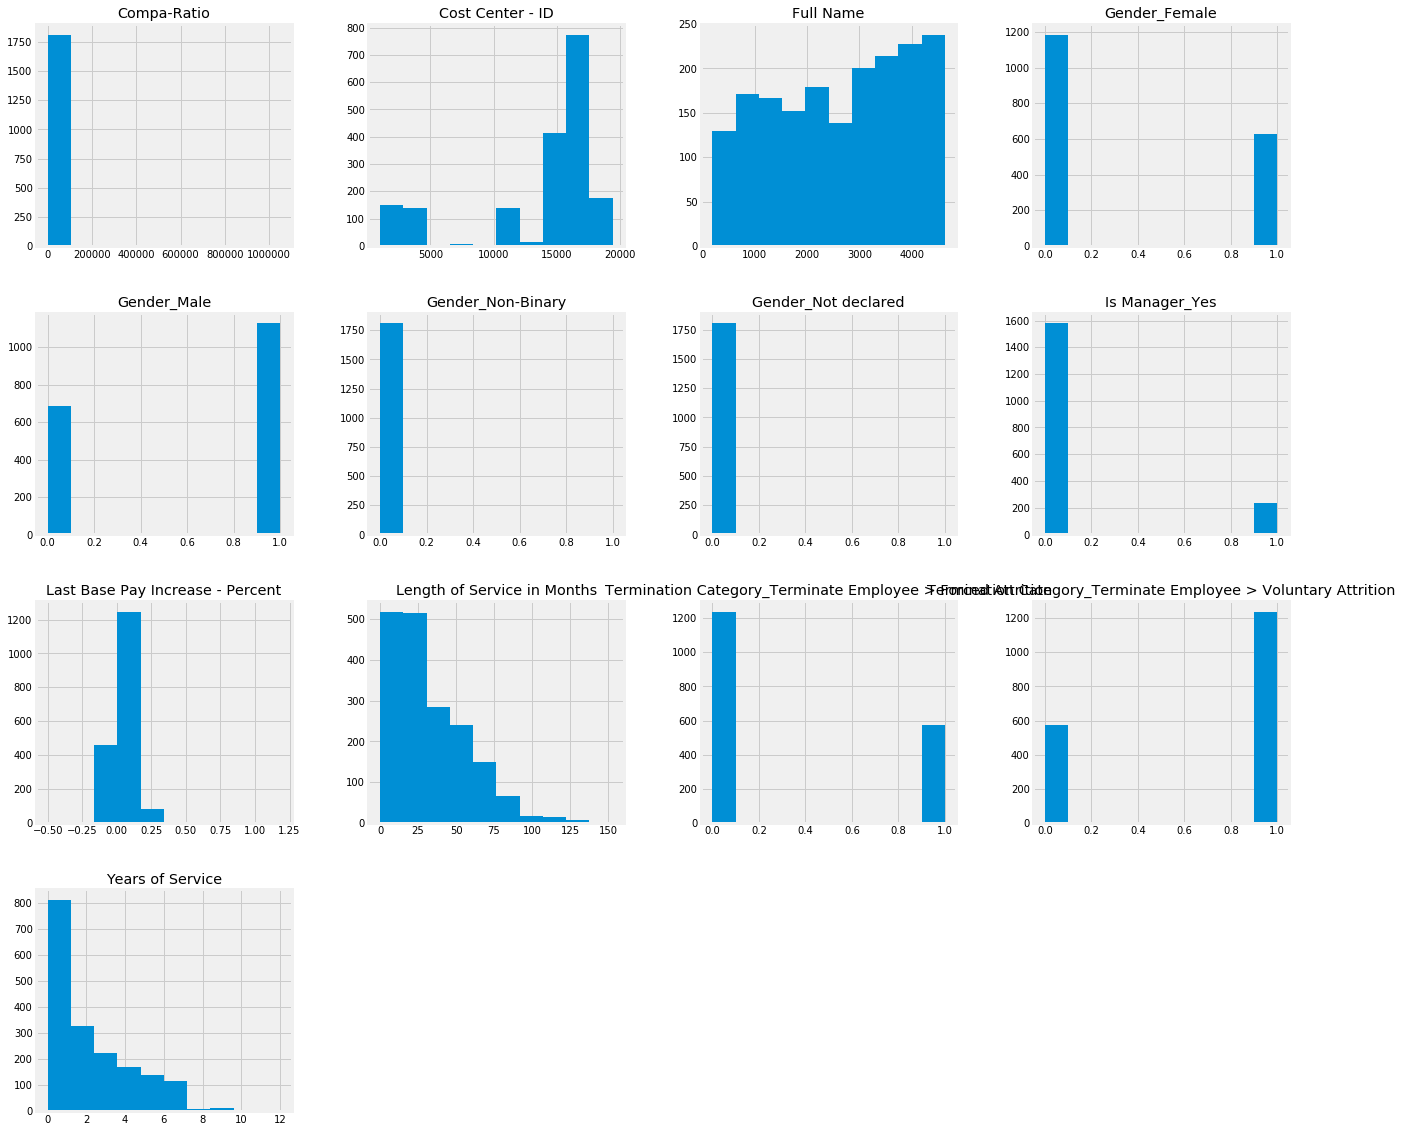

In [60]:
plt.rcParams.update({'font.size': 10})
ax = data.hist(figsize=(20,20))

/Users/evankatz/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


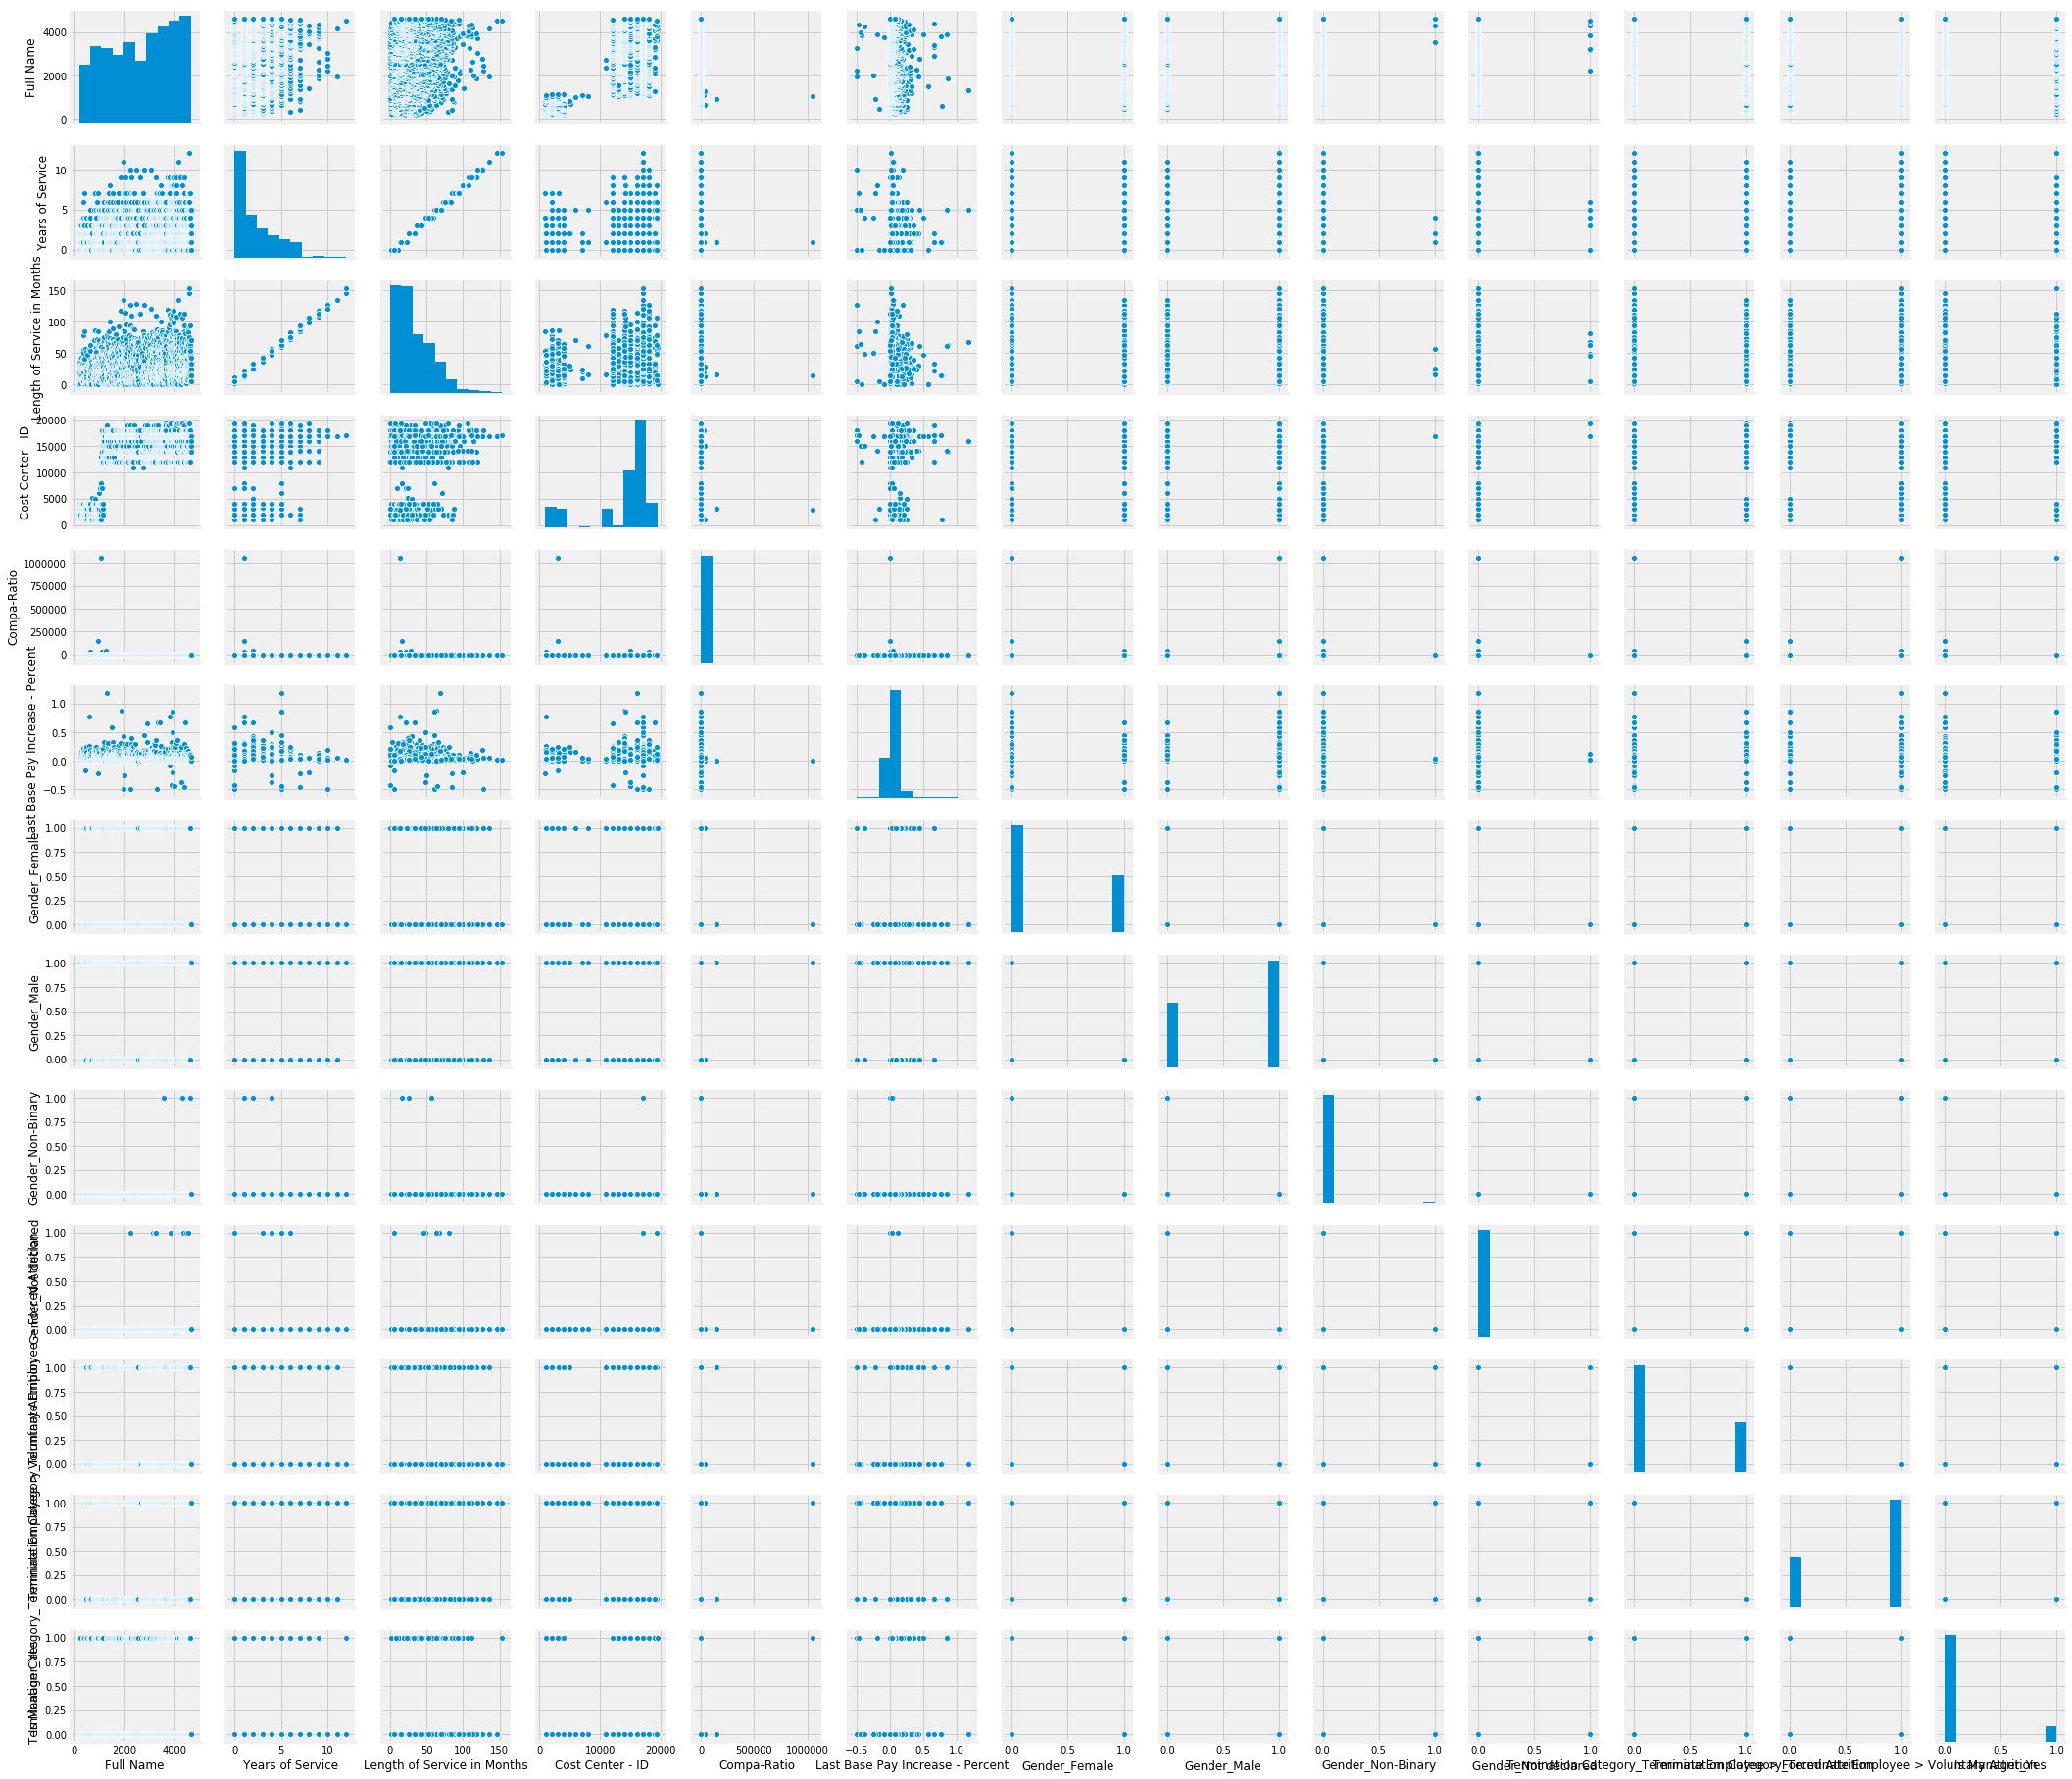

In [69]:
g = sns.pairplot(data)

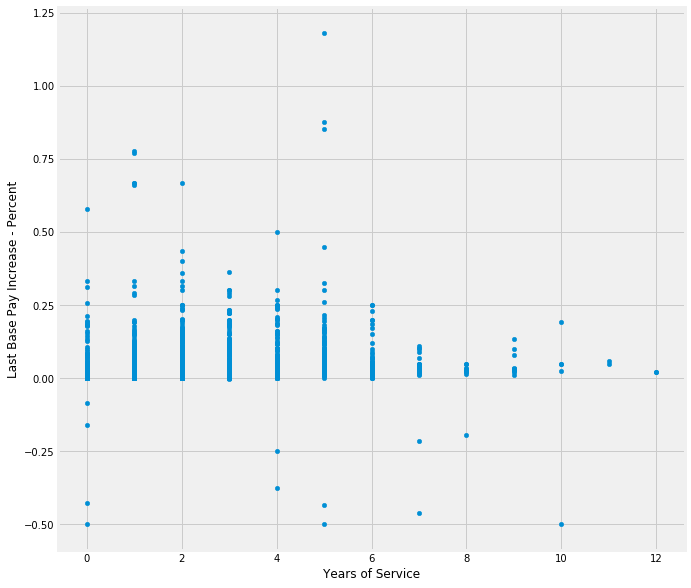

In [87]:
ax = data.plot(kind='scatter', y = 'Last Base Pay Increase - Percent',x = 'Years of Service', figsize = (10,10))

There might be something to comparing the % of last increase and how many years of service the person had when they were terminated